In [156]:
import random
import pylab


def rabbitGrowth():
    """ 
    rabbitGrowth is called once at the beginning of each time step.
    It makes use of the global variables: CURRENTRABBITPOP and MAXRABBITPOP.
    The global variable CURRENTRABBITPOP is modified by this procedure.
    For each rabbit, based on the probabilities in the problem set write-up, 
      a new rabbit may be born.
    Nothing is returned.
    """
    # you need this line for modifying global variables
    global CURRENTRABBITPOP
    p_reproduction = 1 - CURRENTRABBITPOP / MAXRABBITPOP
    for i in range(CURRENTRABBITPOP):
        if random.random() < p_reproduction:
            CURRENTRABBITPOP += 1

            
def foxGrowth(p_birth, p_death):
    """ 
    foxGrowth is called once at the end of each time step.
    It makes use of the global variables: CURRENTFOXPOP and CURRENTRABBITPOP,
        and both may be modified by this procedure.
    Each fox, based on the probabilities in the problem statement, may eat 
      one rabbit (but only if there are more than 10 rabbits).
    If it eats a rabbit, then with a 1/3 prob it gives birth to a new fox.
    If it does not eat a rabbit, then with a 1/10 prob it dies.
    Nothing is returned.
    """
    # you need these lines for modifying global variables
    global CURRENTRABBITPOP
    global CURRENTFOXPOP

    for i in range(CURRENTFOXPOP):
        if CURRENTRABBITPOP > 10 and random.random() < CURRENTRABBITPOP / MAXRABBITPOP:
            CURRENTRABBITPOP -= 1
            if random.random() < p_birth:
                CURRENTFOXPOP += 1
        elif random.random() < p_death:
            CURRENTFOXPOP -= 1

            
def runSimulation(numSteps, p_birth, p_death):
    """
    Runs the simulation for `numSteps` time steps.

    Returns a tuple of two lists: (rabbit_populations, fox_populations)
      where rabbit_populations is a record of the rabbit population at the 
      END of each time step, and fox_populations is a record of the fox population
      at the END of each time step.

    Both lists should be `numSteps` items long.
    """
    rabbit_populations = []
    fox_populations = []
    for i in range(numSteps):
        rabbitGrowth()
        foxGrowth(p_birth, p_death)
        rabbit_populations.append(CURRENTRABBITPOP)
        fox_populations.append(CURRENTFOXPOP)
    
    return (rabbit_populations, fox_populations)

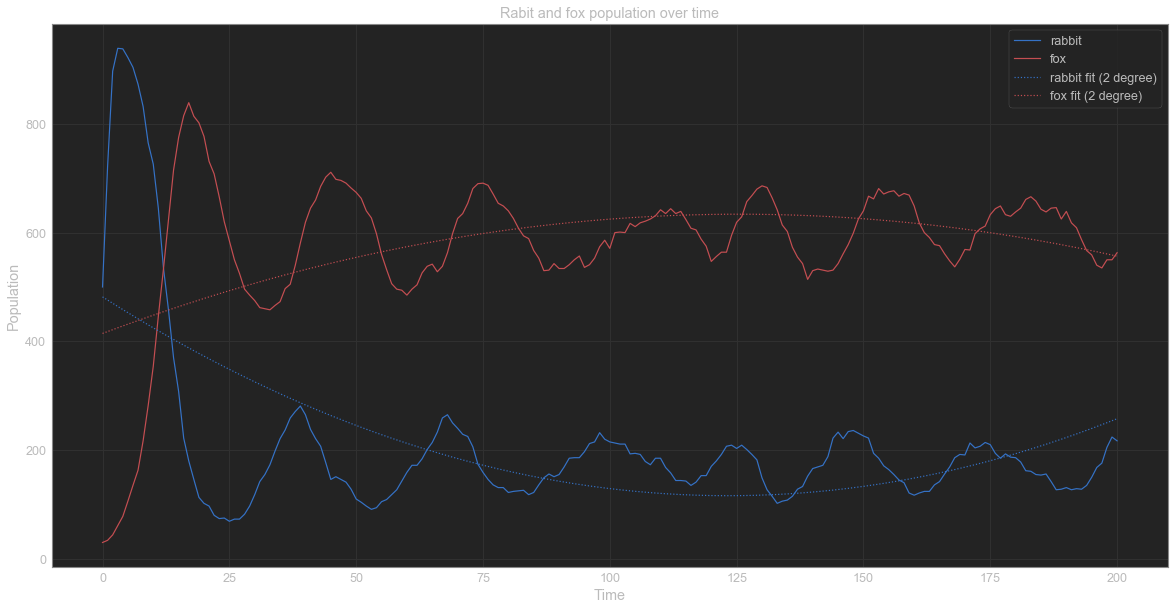

In [163]:
random.seed(0)
# Global Variables
MAXRABBITPOP = 1000
CURRENTRABBITPOP = 500
CURRENTFOXPOP = 30
time_steps = 200
degree = 2


def plot_populations(p_birth, p_death):
    original_rabbit_population = [CURRENTRABBITPOP]
    original_fox_population = [CURRENTFOXPOP]
    rabbit_populations, fox_populations = runSimulation(time_steps, p_birth, p_death)
    rabbit_populations = original_rabbit_population + rabbit_populations
    fox_populations = original_fox_population + fox_populations

    rabbit_coeffs = pylab.polyfit(range(time_steps+1), rabbit_populations, degree)
    fox_coeffs = pylab.polyfit(range(time_steps+1), fox_populations, degree)
    
    pylab.figure(figsize=(20,10))
    pylab.plot(rabbit_populations, 'b', label='rabbit')
    pylab.plot(fox_populations, 'r', label='fox')
    pylab.plot(pylab.polyval(rabbit_coeffs, range(time_steps+1)), 'b:', label='rabbit fit ({} degree)'.format(degree))
    pylab.plot(pylab.polyval(fox_coeffs, range(time_steps+1)), 'r:', label='fox fit ({} degree)'.format(degree))

    pylab.title('Rabit and fox population over time')
    pylab.xlabel('Time')
    pylab.ylabel('Population')
    pylab.legend()
    pylab.show()

    
plot_populations(p_birth=1/3, p_death=1/10)